In [ ]:
import pandas as pd

file_path = '/content/ai_ticket_project_combined.xlsx'
df = pd.read_excel(file_path, sheet_name='Raw Data')

df.head()



,Ticket ID,Timestamp,Text,Category,Priority,AI_Suggested_Reply
0,1000,2025-07-21 06:52:04,How do I update my payment method?,Account Management,Medium,Thank you for contacting us regarding: 'How do...
1,1001,2025-07-24 06:52:04,A mobile widget would be helpful.,Feature Request,High,Thank you for contacting us regarding: 'A mobi...
2,1002,2025-07-17 01:52:04,I was charged twice for my subscription.,Billing Issue,Low,Thank you for contacting us regarding: 'I was ...
3,1003,2025-08-01 01:52:04,Can I delete my account permanently?,Account Management,Medium,Thank you for contacting us regarding: 'Can I ...
4,1004,2025-07-16 04:52:04,It would be great to have an analytics dashboard.,Feature Request,Medium,Thank you for contacting us regarding: 'It wou...


In [ ]:
# Count how many tickets are in each support category
df['Category'].value_counts()


,count
Category,
General Inquiry,13
Account Management,11
Feature Request,9
Billing Issue,9
Technical Issue,8


In [ ]:
# Count how many tickets are marked Low, Medium, or High priority
df['Priority'].value_counts()


,count
Priority,
Medium,26
High,13
Low,11


In [ ]:
# Show only high-priority tickets
df[df['Priority'] == 'High']


,Ticket ID,Timestamp,Text,Category,Priority,AI_Suggested_Reply
1,1001,2025-07-24 06:52:04,A mobile widget would be helpful.,Feature Request,High,Thank you for contacting us regarding: 'A mobi...
10,1010,2025-07-31 04:52:04,The website loads very slowly.,Technical Issue,High,Thank you for contacting us regarding: 'The we...
12,1012,2025-07-23 07:52:04,The website loads very slowly.,Technical Issue,High,Thank you for contacting us regarding: 'The we...
13,1013,2025-07-18 10:52:04,Where can I see my account history?,Account Management,High,Thank you for contacting us regarding: 'Where ...
14,1014,2025-07-22 00:52:04,It would be great to have an analytics dashboard.,Feature Request,High,Thank you for contacting us regarding: 'It wou...
17,1017,2025-07-14 04:52:04,Do you offer discounts for students?,General Inquiry,High,Thank you for contacting us regarding: 'Do you...
18,1018,2025-08-01 11:52:04,The website loads very slowly.,Technical Issue,High,Thank you for contacting us regarding: 'The we...
19,1019,2025-07-04 17:52:04,Can you explain the charges on my statement?,Billing Issue,High,Thank you for contacting us regarding: 'Can yo...
31,1031,2025-07-12 13:52:04,Is there a free trial available?,General Inquiry,High,Thank you for contacting us regarding: 'Is the...
33,1033,2025-07-22 20:52:04,The app keeps crashing on my phone.,Technical Issue,High,Thank you for contacting us regarding: 'The ap...


In [ ]:
def auto_categorize(text):
    text = text.lower()
    if 'refund' in text or 'charged' in text or 'invoice' in text:
        return 'Billing Issue'
    elif 'log in' in text or 'error' in text or 'crash' in text:
        return 'Technical Issue'
    elif 'reset' in text or 'change' in text or 'update' in text:
        return 'Account Management'
    elif 'features' in text or 'trial' in text or 'support hours' in text:
        return 'General Inquiry'
    elif 'add' in text or 'analytics' in text or 'integration' in text:
        return 'Feature Request'
    else:
        return 'Other'

# Apply it to the dataset
df['AI_Category'] = df['Text'].apply(auto_categorize)

# Preview a few rows
df[['Text', 'Category', 'AI_Category']].head(10)


,Text,Category,AI_Category
0,How do I update my payment method?,Account Management,Account Management
1,A mobile widget would be helpful.,Feature Request,Other
2,I was charged twice for my subscription.,Billing Issue,Billing Issue
3,Can I delete my account permanently?,Account Management,Other
4,It would be great to have an analytics dashboard.,Feature Request,Feature Request
5,It would be great to have an analytics dashboard.,Feature Request,Feature Request
6,How do I update my payment method?,Account Management,Account Management
7,How do I change my email address?,Account Management,Account Management
8,Can I speak to a human agent?,General Inquiry,Other
9,What features are included in the basic plan?,General Inquiry,General Inquiry


In [ ]:
# Compare AI-predicted category to actual
(df['Category'] == df['AI_Category']).value_counts()


,count
True,31
False,19


In [ ]:
def auto_priority(text):
    text = text.lower()
    if "can't log in" in text or "urgent" in text or "charged twice" in text or "declined" in text or "error" in text:
        return 'High'
    elif "slow" in text or "update" in text or "reset" in text or "change" in text:
        return 'Medium'
    elif "features" in text or "trial" in text or "add" in text or "support hours" in text:
        return 'Low'
    else:
        return 'Medium'  # Default if it doesn't match anything

# Apply it to the dataset
df['AI_Priority'] = df['Text'].apply(auto_priority)

# Preview result
df[['Text', 'Priority', 'AI_Priority']].head(10)


,Text,Priority,AI_Priority
0,How do I update my payment method?,Medium,Medium
1,A mobile widget would be helpful.,High,Medium
2,I was charged twice for my subscription.,Low,High
3,Can I delete my account permanently?,Medium,Medium
4,It would be great to have an analytics dashboard.,Medium,Medium
5,It would be great to have an analytics dashboard.,Low,Medium
6,How do I update my payment method?,Medium,Medium
7,How do I change my email address?,Medium,Medium
8,Can I speak to a human agent?,Medium,Medium
9,What features are included in the basic plan?,Medium,Low


In [ ]:
# Check how many AI-priority predictions match the original labels
(df['Priority'] == df['AI_Priority']).value_counts()


,count
False,27
True,23


In [ ]:
# Count tickets by category
category_counts = df['Category'].value_counts()

# Count tickets by priority
priority_counts = df['Priority'].value_counts()

# Show results
print("📁 Ticket Categories:\n", category_counts)
print("\n🚨 Ticket Priorities:\n", priority_counts)


📁 Ticket Categories:
 Category
General Inquiry       13
Account Management    11
Feature Request        9
Billing Issue          9
Technical Issue        8
Name: count, dtype: int64

🚨 Ticket Priorities:
 Priority
Medium    26
High      13
Low       11
Name: count, dtype: int64


In [ ]:
# Convert the Timestamp column to proper datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by date and count tickets
daily_counts = df['Timestamp'].dt.date.value_counts().sort_index()

# Show results
print("📆 Ticket volume by date:\n")
print(daily_counts)


📆 Ticket volume by date:

Timestamp
2025-07-04    3
2025-07-05    1
2025-07-06    1
2025-07-07    4
2025-07-09    1
2025-07-10    1
2025-07-12    2
2025-07-13    1
2025-07-14    3
2025-07-16    1
2025-07-17    2
2025-07-18    1
2025-07-20    2
2025-07-21    2
2025-07-22    4
2025-07-23    2
2025-07-24    3
2025-07-26    5
2025-07-27    2
2025-07-28    2
2025-07-29    1
2025-07-30    1
2025-07-31    1
2025-08-01    3
2025-08-03    1
Name: count, dtype: int64


In [ ]:
def generate_reply(category):
    if category == 'Billing Issue':
        return "Thanks for reaching out about a billing issue. We’re reviewing your charges and will follow up shortly."
    elif category == 'Technical Issue':
        return "Sorry you're experiencing a technical issue. Our team is looking into it now."
    elif category == 'Account Management':
        return "We've received your request regarding your account. We’ll get back to you soon."
    elif category == 'General Inquiry':
        return "Thanks for your question! We’ll provide the information you need shortly."
    elif category == 'Feature Request':
        return "Thanks for the feedback! We’ve noted your feature suggestion."
    else:
        return "Thanks for contacting us. We'll review your message and respond as soon as possible."

# Apply it using your AI-generated category
df['AI_Reply'] = df['AI_Category'].apply(generate_reply)

# Preview a few results
df[['Text', 'AI_Category', 'AI_Reply']].head(10)


,Text,AI_Category,AI_Reply
0,How do I update my payment method?,Account Management,We've received your request regarding your acc...
1,A mobile widget would be helpful.,Other,Thanks for contacting us. We'll review your me...
2,I was charged twice for my subscription.,Billing Issue,Thanks for reaching out about a billing issue....
3,Can I delete my account permanently?,Other,Thanks for contacting us. We'll review your me...
4,It would be great to have an analytics dashboard.,Feature Request,Thanks for the feedback! We’ve noted your feat...
5,It would be great to have an analytics dashboard.,Feature Request,Thanks for the feedback! We’ve noted your feat...
6,How do I update my payment method?,Account Management,We've received your request regarding your acc...
7,How do I change my email address?,Account Management,We've received your request regarding your acc...
8,Can I speak to a human agent?,Other,Thanks for contacting us. We'll review your me...
9,What features are included in the basic plan?,General Inquiry,Thanks for your question! We’ll provide the in...


In [ ]:
import matplotlib.pyplot as plt


/tmp/ipython-input-426252189.py:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


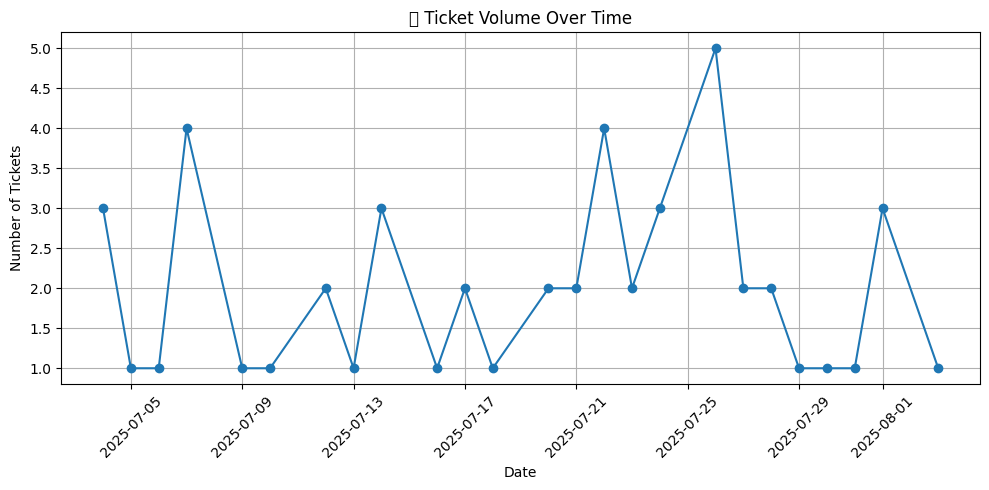

In [ ]:
# Group by date
daily_counts = df['Timestamp'].dt.date.value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_counts.index, daily_counts.values, marker='o')
plt.title('📈 Ticket Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1588627179.py:12: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


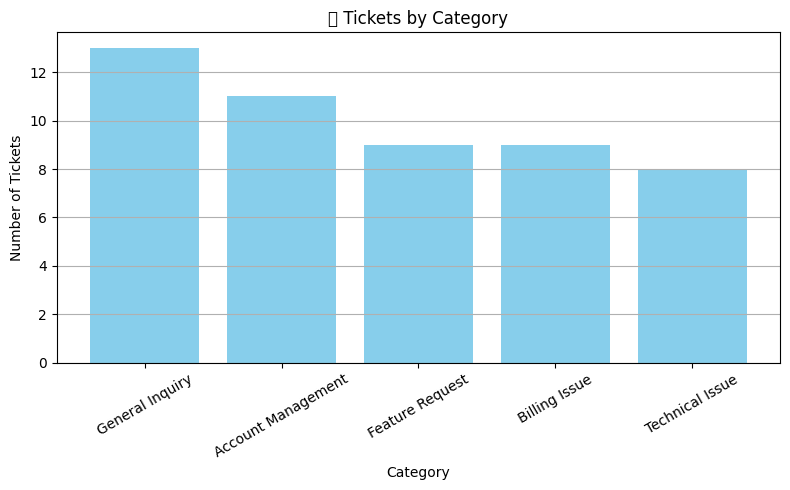

In [ ]:
# Count tickets by category
category_counts = df['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='skyblue')
plt.title('📊 Tickets by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tickets')
plt.xticks(rotation=30)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-410348631.py:9: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


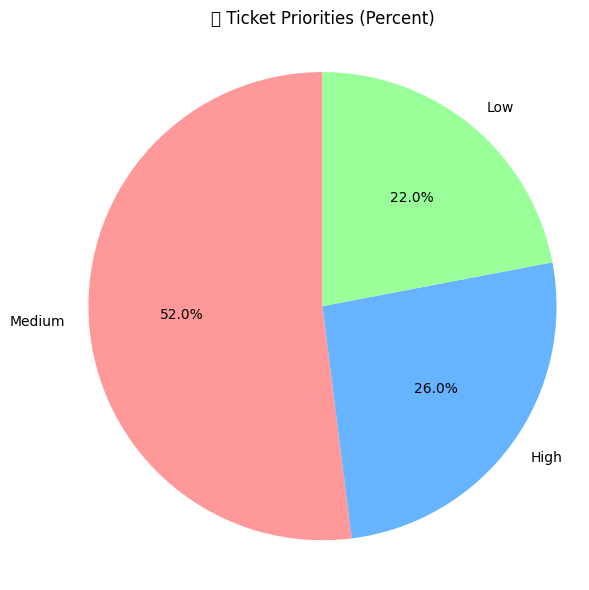

In [ ]:
# Count priorities
priority_counts = df['Priority'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(priority_counts.values, labels=priority_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('🥧 Ticket Priorities (Percent)')
plt.axis('equal')  # Keeps the pie round
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
# Use 'Text' as input and 'Category' as the label
X = df['Text']
y = df['Category']

# Split into 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert text to numeric features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Predict the categories for the test data
y_pred = model.predict(X_test_tfidf)

# Check accuracy
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))

# See how well it did across all categories
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.7

📊 Classification Report:

                    precision    recall  f1-score   support

Account Management       0.50      1.00      0.67         1
     Billing Issue       1.00      0.50      0.67         4
   Feature Request       0.50      1.00      0.67         1
   General Inquiry       0.75      1.00      0.86         3
   Technical Issue       0.00      0.00      0.00         1

          accuracy                           0.70        10
         macro avg       0.55      0.70      0.57        10
      weighted avg       0.72      0.70      0.66        10



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Example new ticket
new_ticket = ["I can't log into my account and I’m getting an error. Please help."]

# Convert to TF-IDF
new_ticket_tfidf = vectorizer.transform(new_ticket)

# Predict the category
predicted_category = model.predict(new_ticket_tfidf)

print("📝 New Ticket:", new_ticket[0])
print("🤖 Predicted Category:", predicted_category[0])


📝 New Ticket: I can't log into my account and I’m getting an error. Please help.
🤖 Predicted Category: Account Management
